# Plotting the Performance Test Results

We use this notebook to i.plot the results of the [performance_profiling](https://github.com/iloudaros/LoudVA/blob/main/ansible/performance_profiling.yaml) play, that collects results for different Jetson Configurations.

In [1]:
import iPlotter as i

device = 'xavier-nx-00'
measurement_code = 'Representative'
measurement_dir = f'/home/louduser/LoudVA/measurements/archive/{measurement_code}/{device}/measurements'

## Plotting the results of the GPU Frequency Test

### Inferences per second

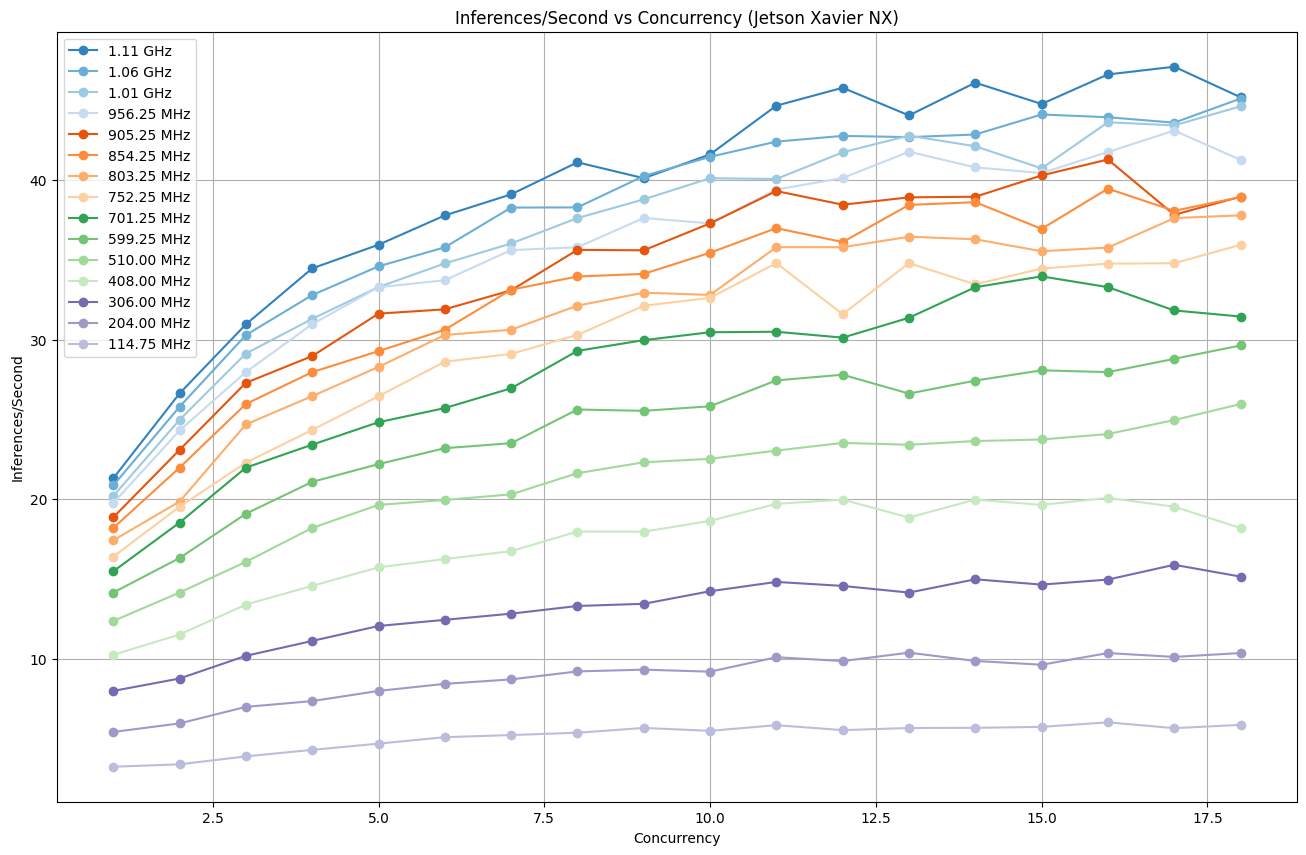

In [2]:
i.plot(f"{measurement_dir}/performance/freqs", 0, 1, "Concurrency", "Inferences/Second", "Inferences/Second vs Concurrency (Jetson Xavier NX)")

#### Energy Consumption

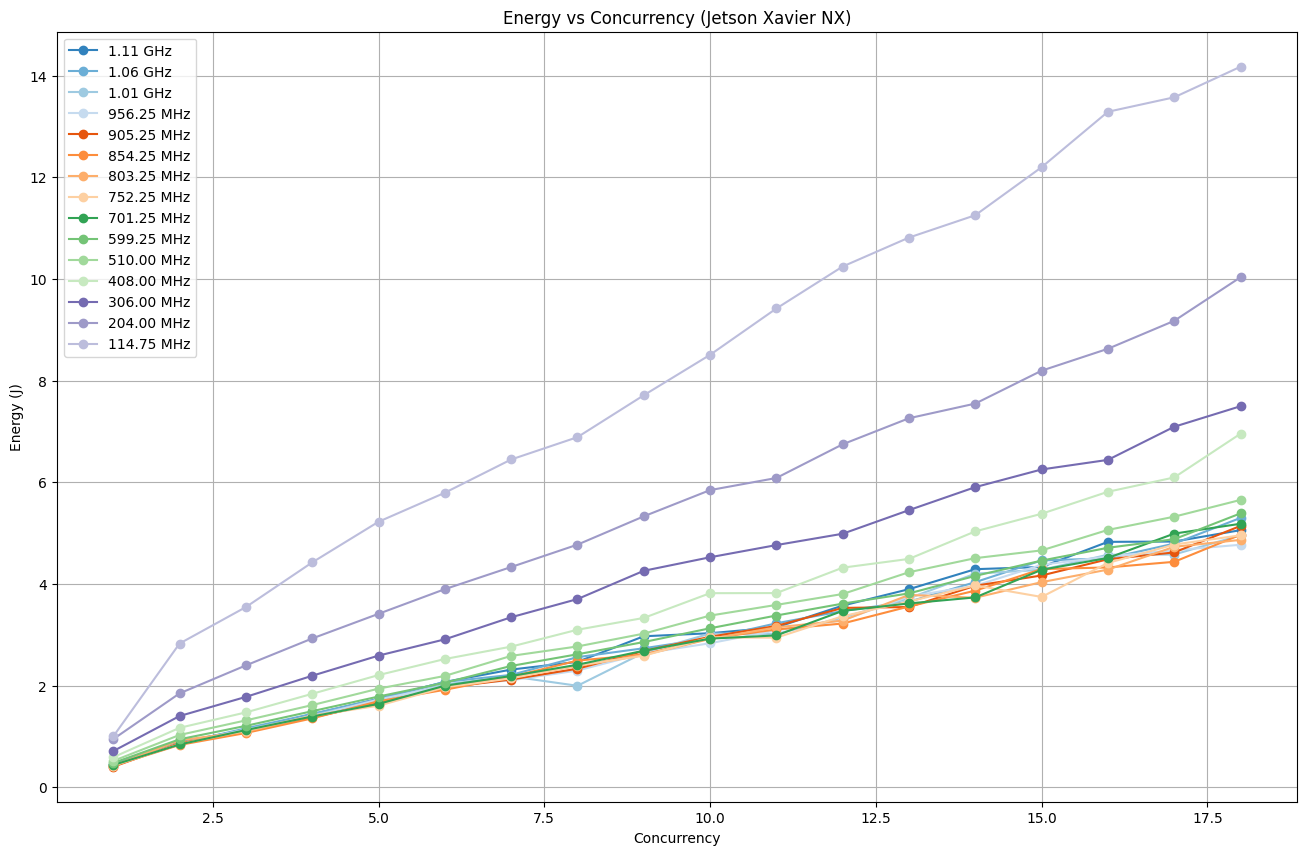

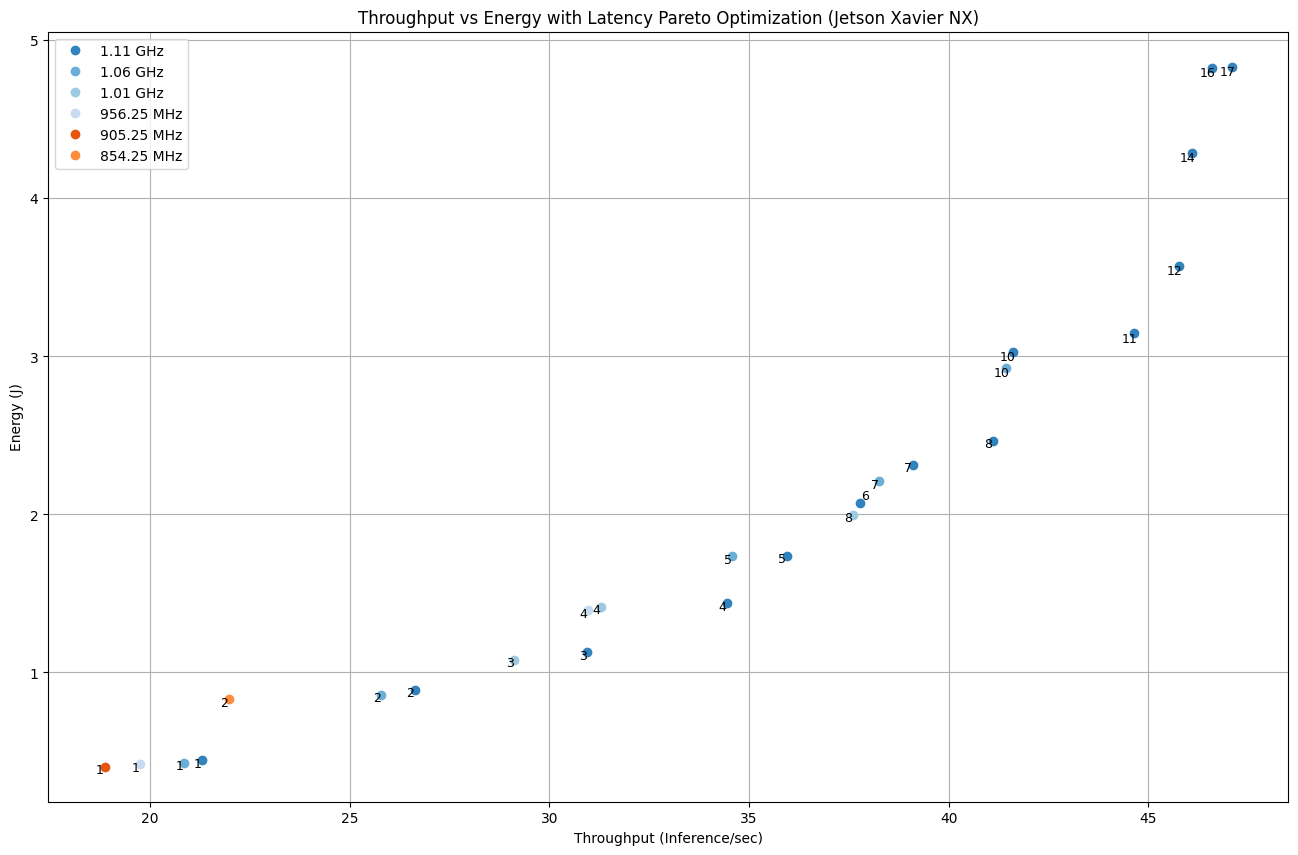

In [3]:
i.plot(f"{measurement_dir}/energy/freqs", 0, 4, "Concurrency", "Energy (J)", "Energy vs Concurrency (Jetson Xavier NX)")
i.plot(
    folder_paths=f"{measurement_dir}/energy/freqs",
    row_number_x=3,
    row_number_y=4,
    row_name_x='Throughput (Inference/sec)',
    row_name_y='Energy (J)',
    title='Throughput vs Energy with Latency Pareto Optimization (Jetson Xavier NX)',
    connect_points=False,
    label_column=0,
    label_points=True,
    row_number_z=2,
    pareto_boundary=True,
    maximize_x=True,
    maximize_y=False,
    maximize_z=False,
    distrust_file_paths=f"{measurement_dir}/retried_freqs.txt",
    distrust_threshold=0,
    debug_mode=False,
    export_file_path=f"{measurement_dir}/{device}_filtered_freqs.csv"
)

### Latency

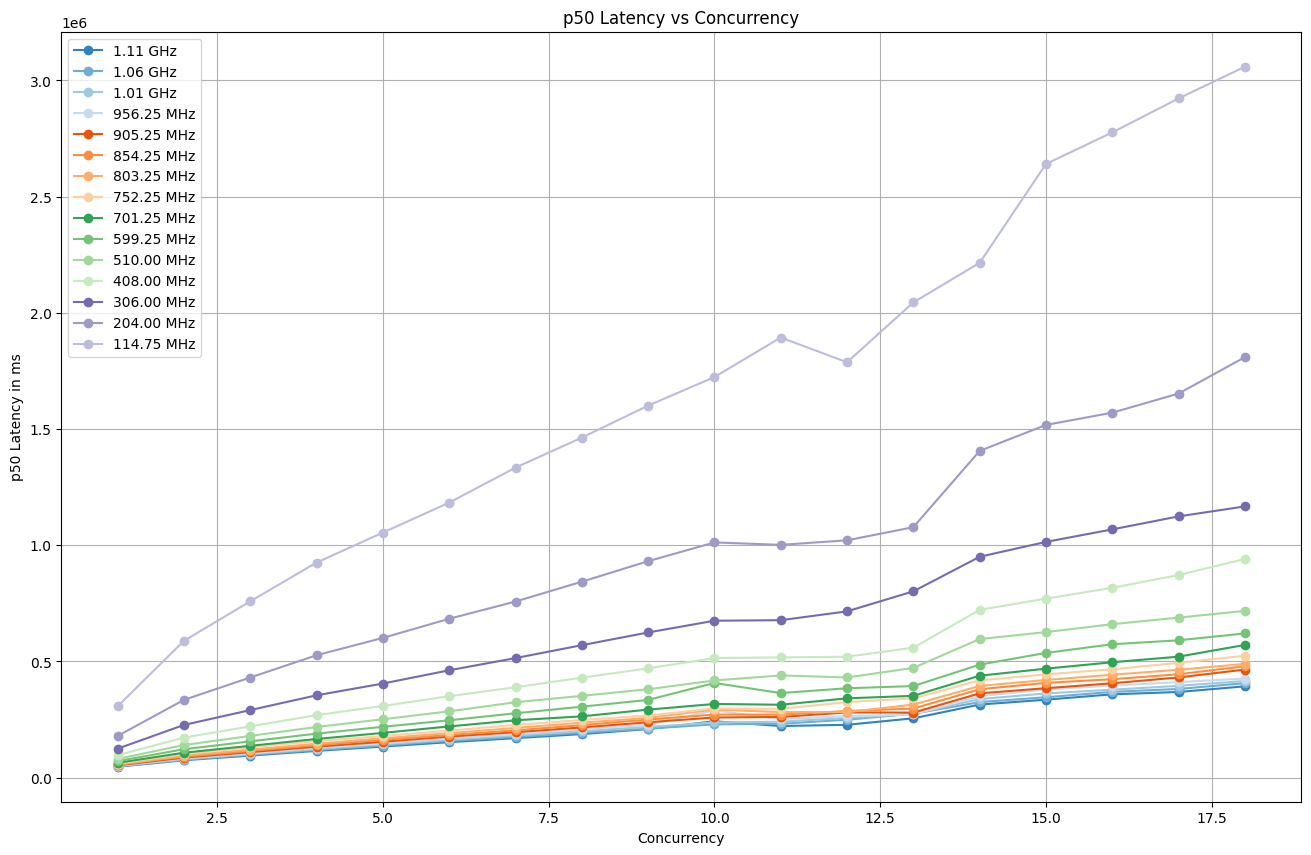

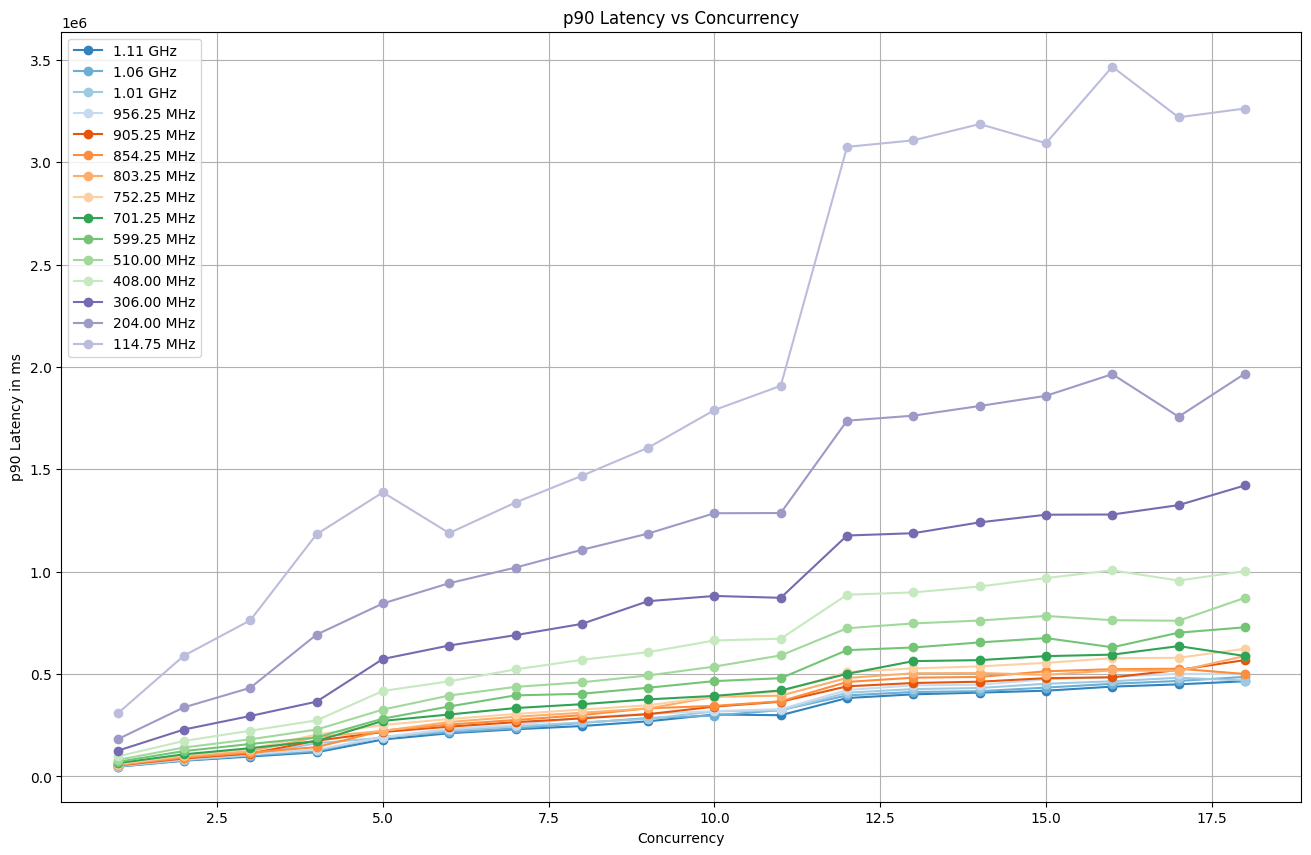

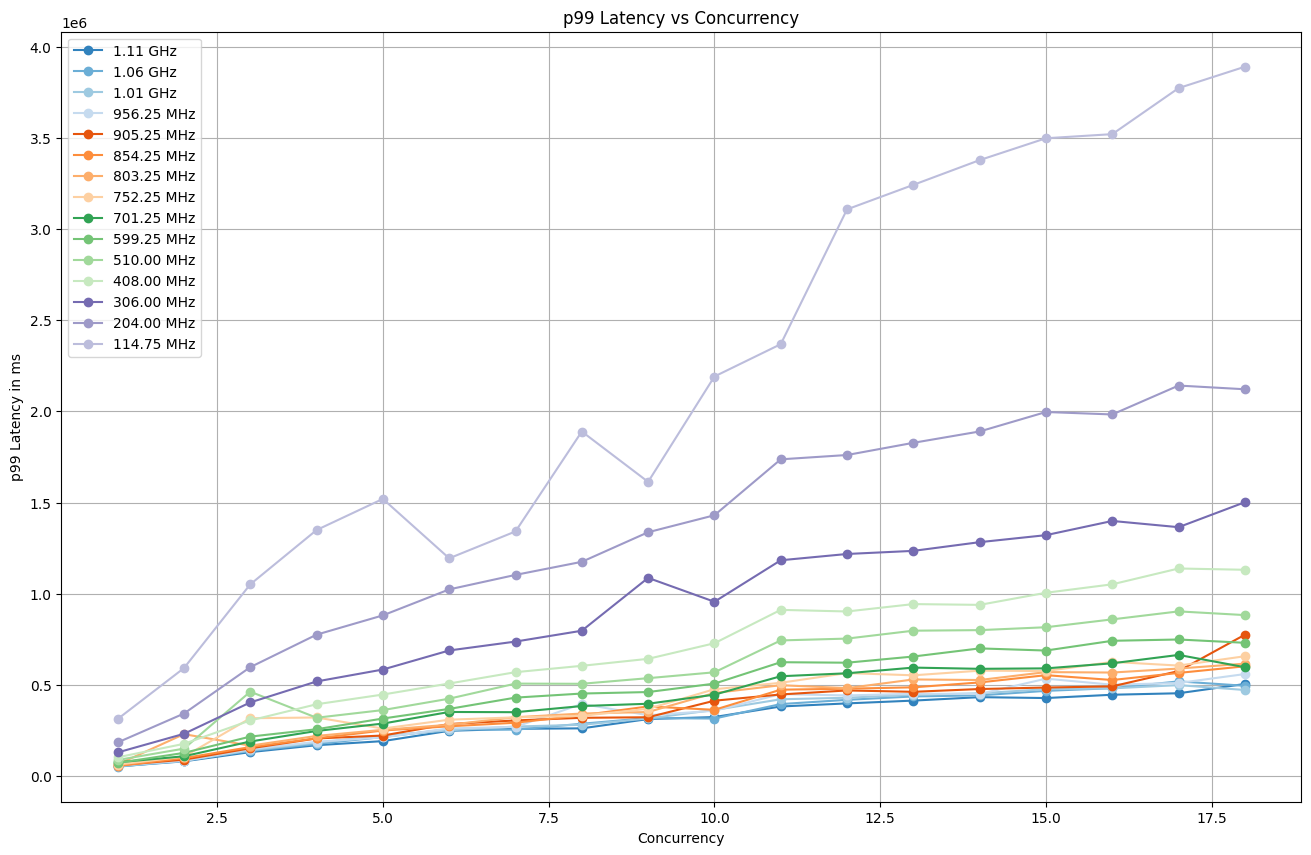

In [4]:
i.plot(f"{measurement_dir}/performance/freqs", 0, 9, "Concurrency", "p50 Latency in ms", "p50 Latency vs Concurrency")
i.plot(f"{measurement_dir}/performance/freqs", 0, 10, "Concurrency", "p90 Latency in ms", "p90 Latency vs Concurrency")
i.plot(f"{measurement_dir}/performance/freqs", 0, 12, "Concurrency", "p99 Latency in ms", "p99 Latency vs Concurrency")

#### Energy Consumption

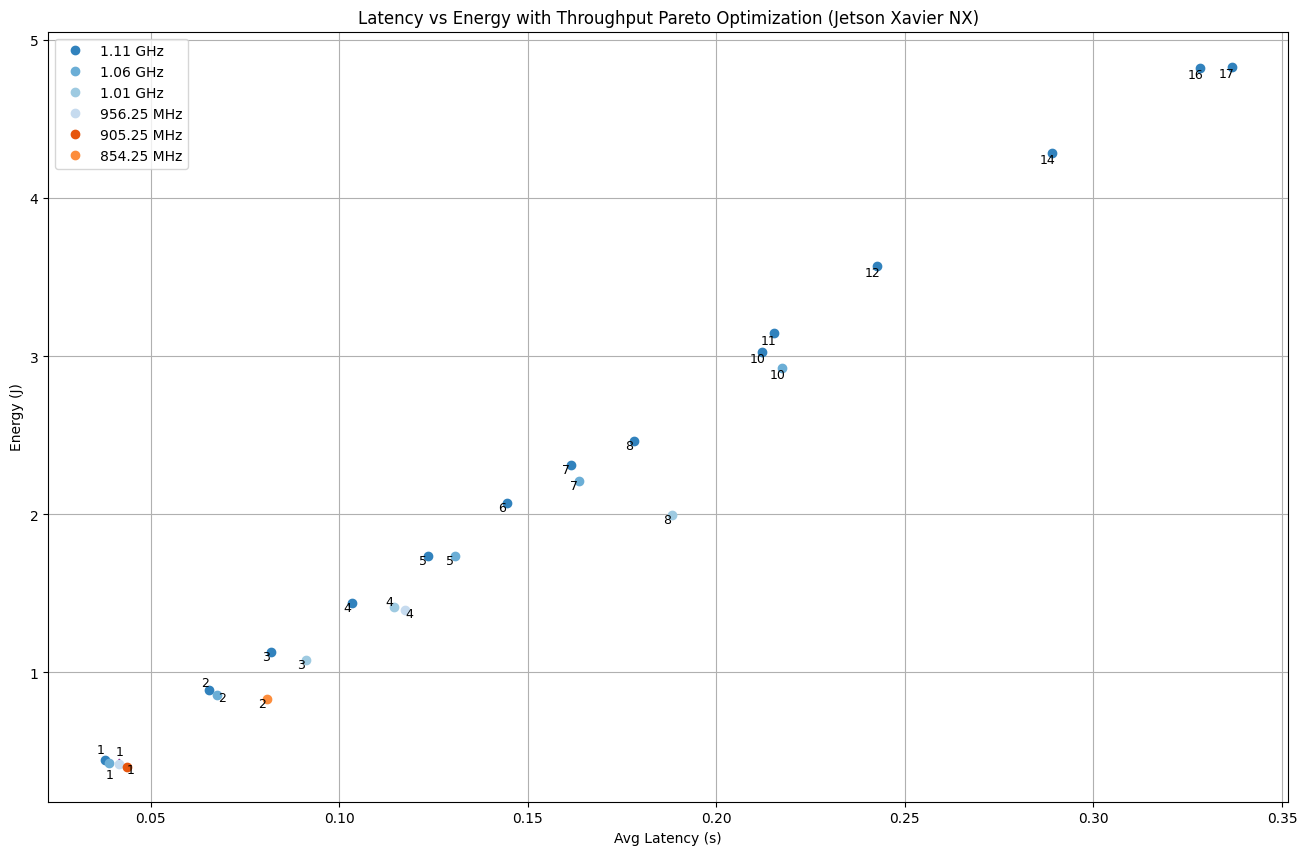

In [5]:
i.plot(
    folder_paths=f"{measurement_dir}/energy/freqs",
    row_number_x=2,
    row_number_y=4,
    row_name_x="Avg Latency (s)",
    row_name_y='Energy (J)',
    title='Latency vs Energy with Throughput Pareto Optimization (Jetson Xavier NX)',
    connect_points=False,
    label_column=0,
    label_points=True,
    row_number_z=3,
    pareto_boundary=True,
    maximize_x=False,
    maximize_y=False,
    maximize_z=True,
    offset=(0,0),
    export_file_path=f"{measurement_dir}/{device}_filtered_freqs.csv",
    distrust_threshold=0,
    )

### Latency vs Inferences per second

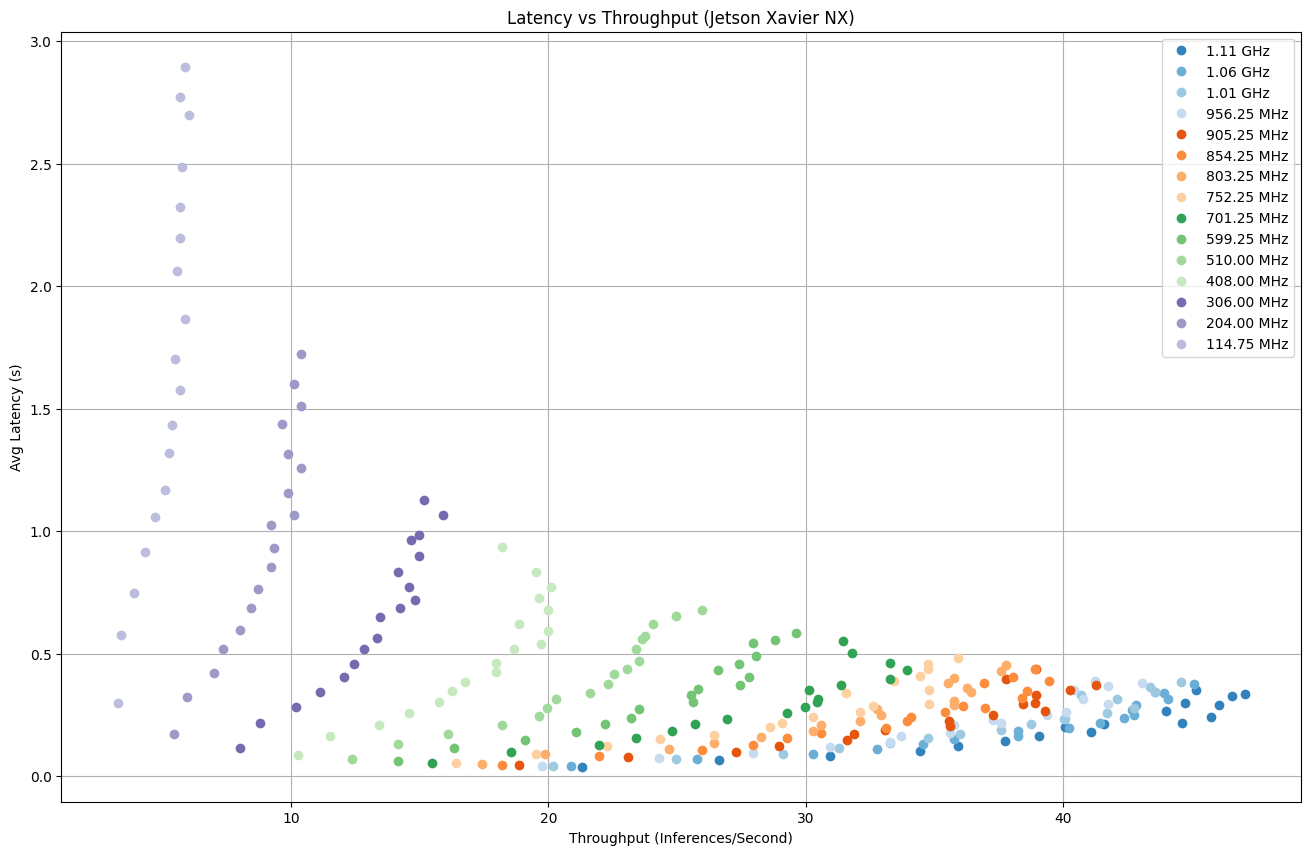

In [6]:
i.plot(f"{measurement_dir}/energy/freqs", 3, 2, "Throughput (Inferences/Second)", "Avg Latency (s)", "Latency vs Throughput (Jetson Xavier NX)", connect_points=False)

## Plotting the results of the Power Mode Test


### Inferences per second

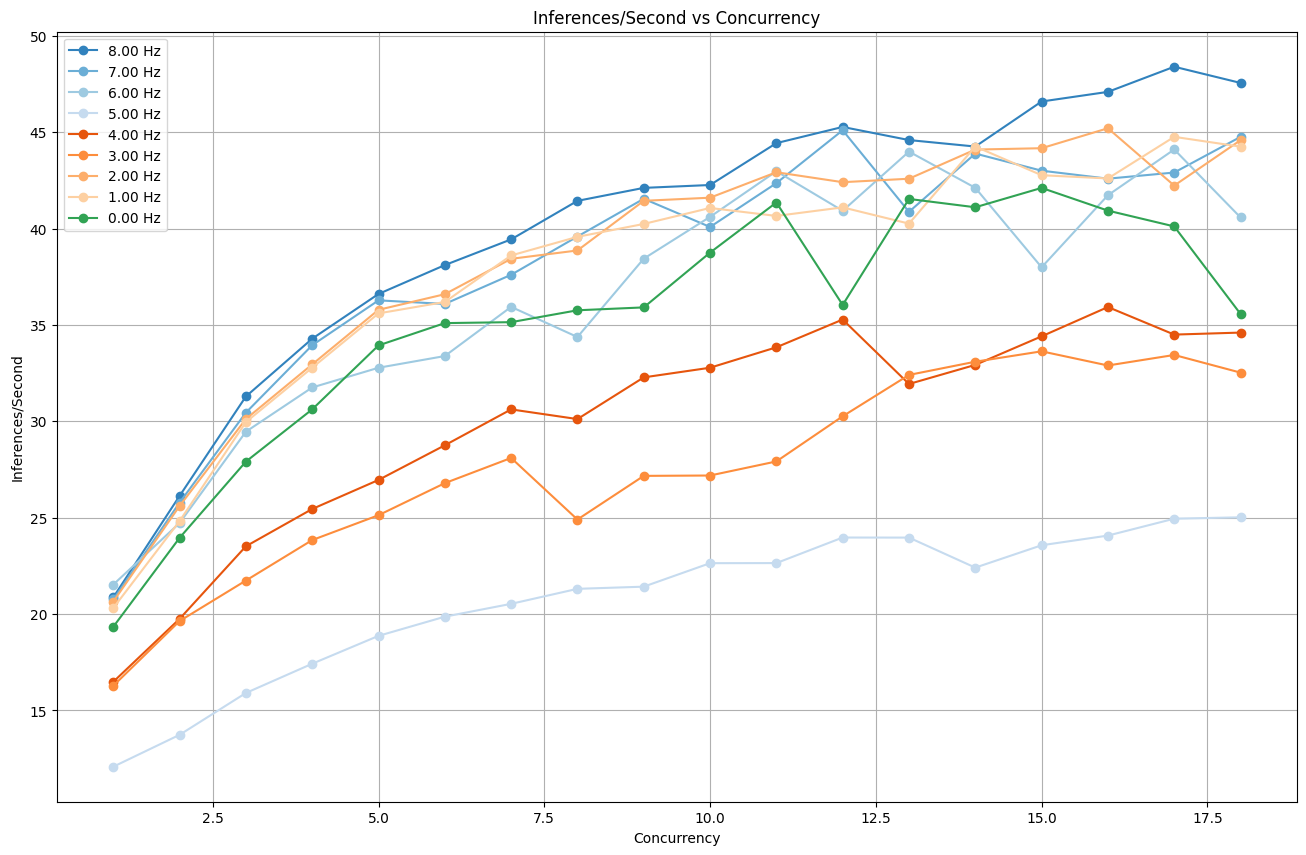

In [7]:
i.plot(f"{measurement_dir}/performance/modes", 0, 1, "Concurrency", "Inferences/Second", "Inferences/Second vs Concurrency")

### Latency

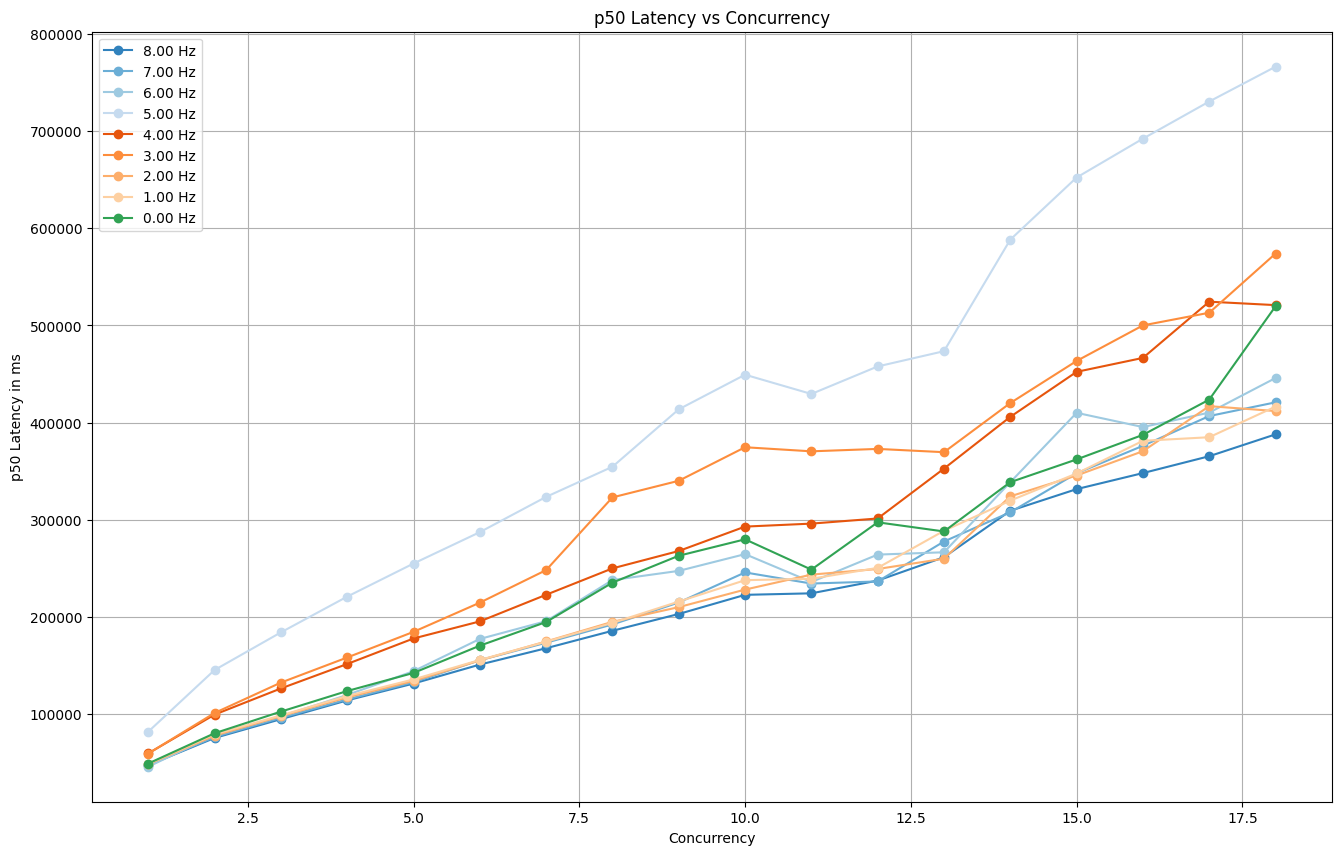

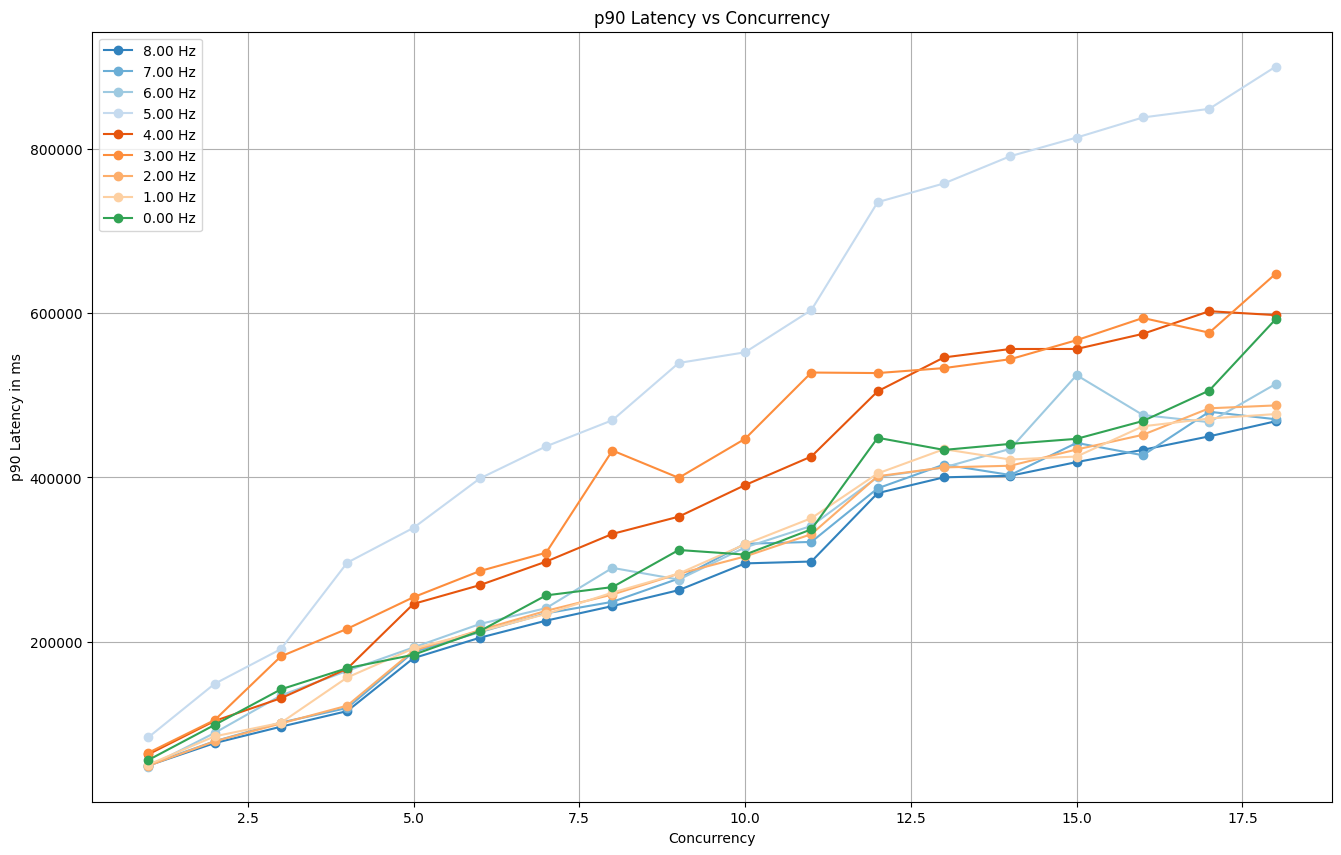

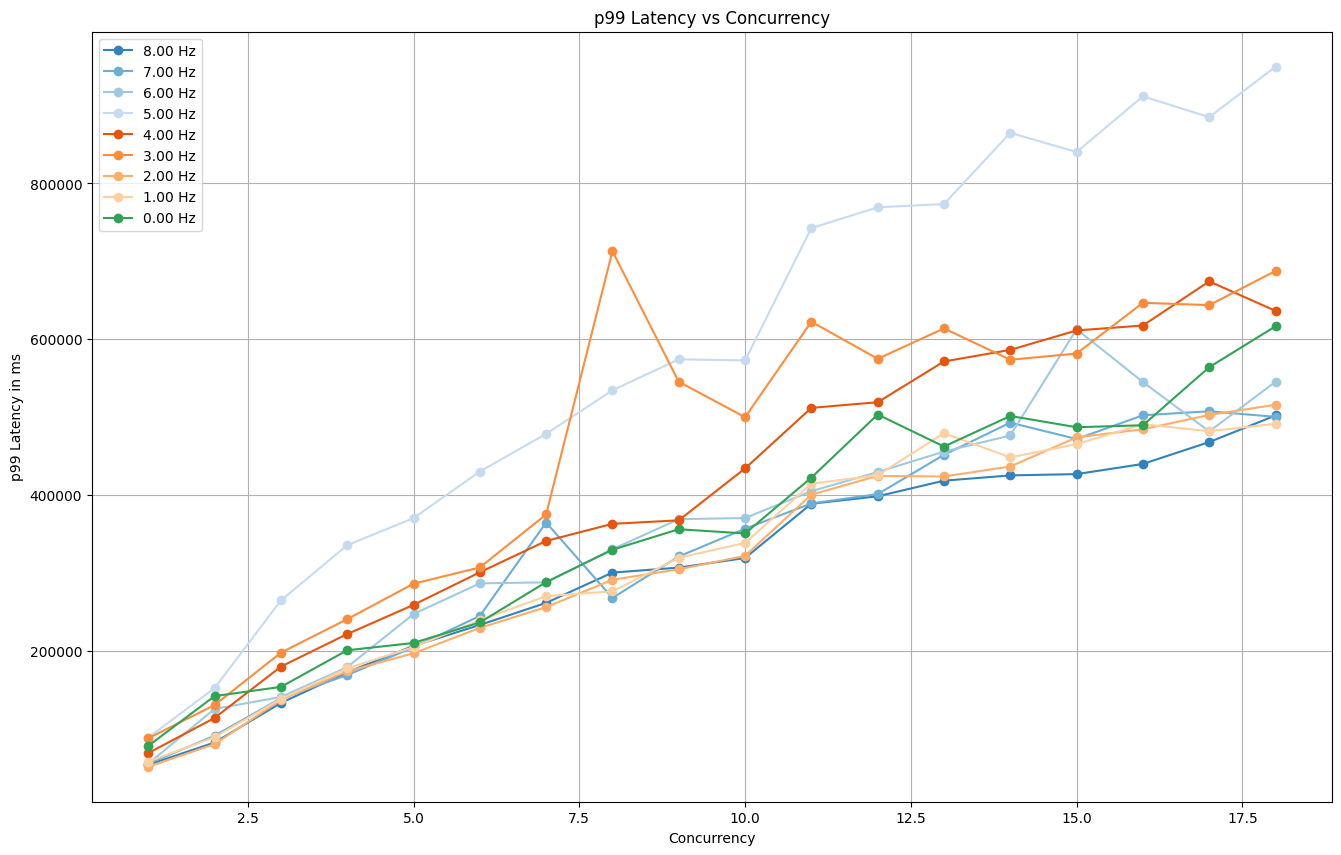

In [8]:
i.plot(f"{measurement_dir}/performance/modes", 0, 9, "Concurrency", "p50 Latency in ms", "p50 Latency vs Concurrency")
i.plot(f"{measurement_dir}/performance/modes", 0, 10, "Concurrency", "p90 Latency in ms", "p90 Latency vs Concurrency")
i.plot(f"{measurement_dir}/performance/modes", 0, 12, "Concurrency", "p99 Latency in ms", "p99 Latency vs Concurrency")